# PyTorch software benchmark analysis

Single node throughput comparisons between installation versions

In [1]:
import os
import re
import glob

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams.update({'font.size': 14})

## Load the results

In [4]:
ls /global/cscratch1/sd/sfarrell/pytorch-benchmarks/results

gpu-1.7.0-nccl-n1/         gpu-v1.2.0-nccl-n1/  hsw-1.7.1-mpi-n4/
gpu-1.7.1-gloo-n1/         gpu-v1.3.1-nccl-n1/  hsw-1.7.1-mpi-n64/
gpu-1.7.1-gloo-n16/        gpu-v1.4.0-nccl-n1/  hsw-1.7.1-mpi-n8/
gpu-1.7.1-gloo-n2/         gpu-v1.5.1-nccl-n1/  hsw-v1.2.0-mpi-n1/
gpu-1.7.1-gloo-n32/        gpu-v1.6.0-nccl-n1/  hsw-v1.3.1-mpi-n1/
gpu-1.7.1-gloo-n4/         hsw-1.7.1-gloo-n1/   hsw-v1.4.0-mpi-n1/
gpu-1.7.1-gloo-n64/        hsw-1.7.1-gloo-n16/  hsw-v1.5.0-mpi-n1/
gpu-1.7.1-gloo-n8/         hsw-1.7.1-gloo-n2/   hsw-v1.6.0-mpi-n1/
gpu-1.7.1-nccl-n1/         hsw-1.7.1-gloo-n32/  knl-1.7.1-mpi-n1/
gpu-1.7.1-nccl-n16/        hsw-1.7.1-gloo-n4/   knl-1.7.1-mpi-n16/
gpu-1.7.1-nccl-n2/         hsw-1.7.1-gloo-n64/  knl-1.7.1-mpi-n2/
gpu-1.7.1-nccl-n32/        hsw-1.7.1-gloo-n8/   knl-1.7.1-mpi-n32/
gpu-1.7.1-nccl-n4/         hsw-1.7.1-mpi-n1/    knl-1.7.1-mpi-n4/
gpu-1.7.1-nccl-n64/        hsw-1.7.1-mpi-n16/   knl-1.7.1-mpi-n64/
gpu-1.7.1-nccl-n8/         hsw-1.7.1-mpi-n2/    knl-1.7.1-mpi-n8/
g

In [19]:
results_files = glob.glob('/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/hsw-*-n1/results.txt')

results_files

['/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/hsw-v1.3.1-mpi-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/hsw-v1.6.0-mpi-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/hsw-v1.2.0-mpi-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/hsw-1.7.1-mpi-n1/results.txt']

In [20]:
results = [pd.read_csv(f, delim_whitespace=True) for f in results_files]
results = pd.concat(results, ignore_index=True)
results.version = results.version.apply(lambda s: s.lstrip('v'))
results = results.sort_values('version')

results

,train_rate,inference_rate,ranks,hardware,version,backend,model
14,23.892666,46.485593,1,hsw,1.2.0,mpi,cnn3d
13,14.632251,37.498390,1,hsw,1.2.0,mpi,resnet50
12,213.417174,682.692711,1,hsw,1.2.0,mpi,alexnet
11,650.044671,2734.242050,1,hsw,1.2.0,mpi,lstm
10,7.608130,28.118234,1,hsw,1.2.0,mpi,transformer
0,7.745227,27.457707,1,hsw,1.3.1,mpi,transformer
1,644.677564,2610.069286,1,hsw,1.3.1,mpi,lstm
2,198.531888,684.354039,1,hsw,1.3.1,mpi,alexnet
3,14.996481,46.225346,1,hsw,1.3.1,mpi,resnet50
4,24.243660,48.183499,1,hsw,1.3.1,mpi,cnn3d


## Training throughput comparisons

In [21]:
models = results.model.unique()

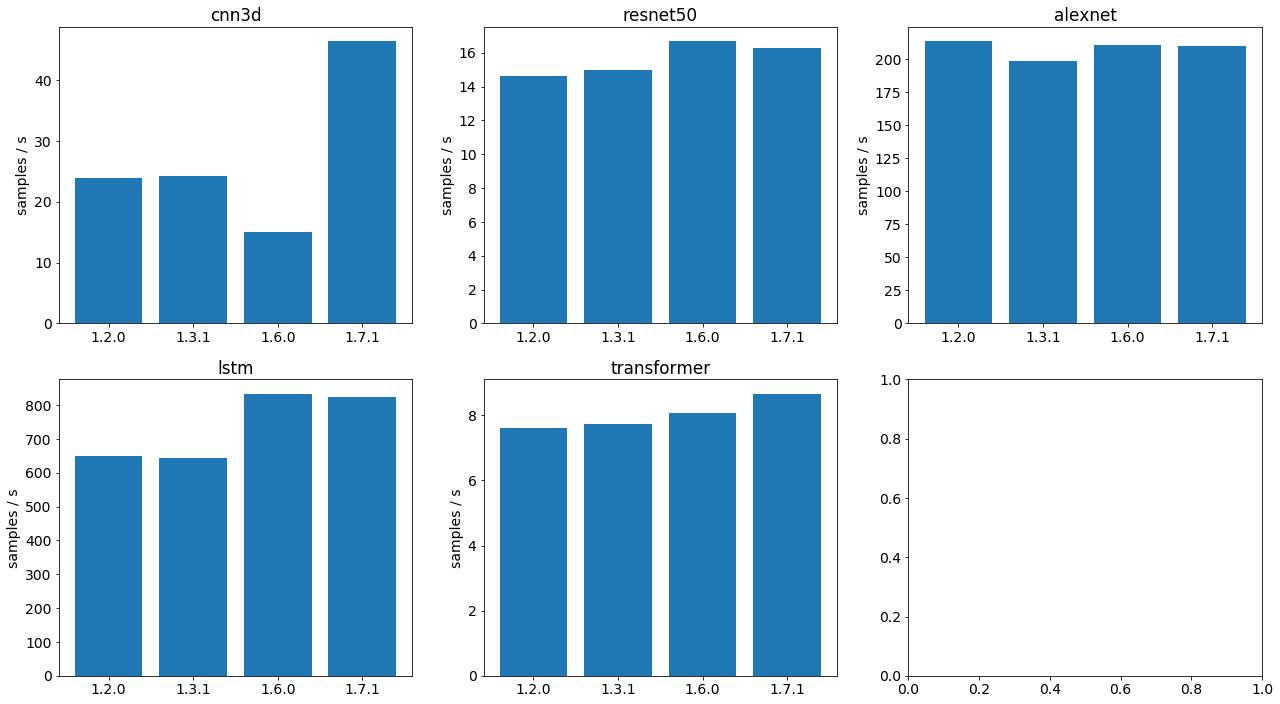

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results[results.model == model].sort_values('version')
    ax.bar(model_results.version, model_results.train_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()

## Inference throughput comparisons

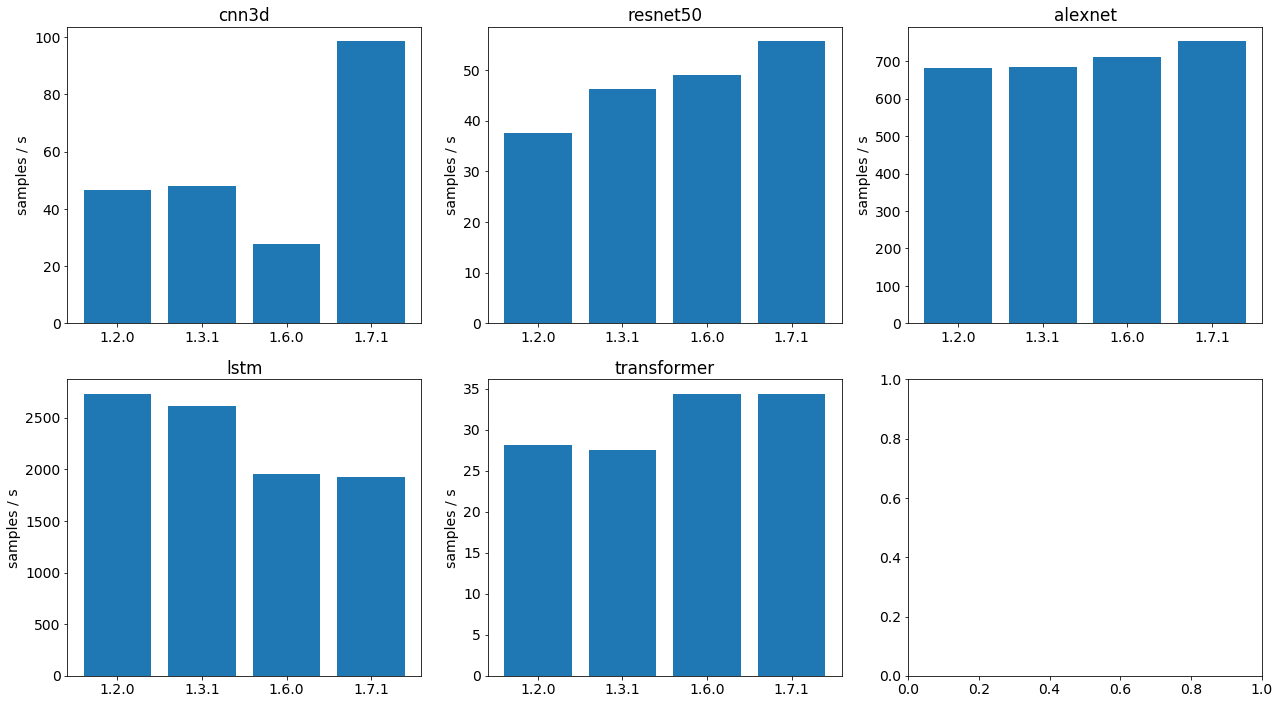

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results[results.model == model].sort_values('version')
    ax.bar(model_results.version, model_results.inference_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()